Social Data Science WS19/20

# Home Assignment 1



Submit your solution via Moodle until 23.59pm on Wednesday, November 6th. Late submissions are accepted for 12 hours following the deadline, with 1/3 of the total possible points deducted from the score.

You can (and should!) submit solutions in teams of up 2-3 members.
Please denote all members of the team with their student id and full name in the notebook. Please submit only one notebook per team. Only submit a notebook, do not submit the dataset(s) you used.

Cite ALL your sources for coding this home assignment. In case of plagiarism (copying solutions from other teams or from the internet) ALL team members will be expelled from the course without warning.

##### List team members, including all student IDs here:
1. Mohamed
2. Romayssa
3. Mahmoud

## Exploring the Quality of Government Dataset

In this home assignment we are going to explore the 2019 Quality of Government dataset(s) that has been assembled by the QOG institute from University of Gothenburg.
All data as well as documentation can be found here: https://www.qogdata.pol.gu.se/data/

Note that we only consider the data that has been published in January 2019, i.e. the data files that contain the suffix "jan19". Do NOT use any other dataset other than those that can be found in this online repo, except for the data file that we refer to in task 1.

#### Coding guidelines:
* Make sure that your code is executable, any task for which the code does directly not run on our machine will be graded with 0 points.
* In that regard, do not rename the dataset you use, and load it from the same directory that your ipynb-notebook is located in, i.e., your working directory. In particular, when loading your file via a pandas or numpy command, make sure that it has the form `pd.read_csv("qog_file.csv")` instead of `pd.read_csv("C:/User/Path/to/your/Homework/qog_file.csv")` so that the code directly works from our machines.
* Make sure you clean up your code before submission, e.g., properly align your code, and delete every line of code that you do not need anymore, even if you may have experimented with it
* Feel free to use comments in the code. While we do not require them to get full marks, they may help us in case your code has minor errors
* You may create as many additional cells as you want, just make sure that the solutions to the individual tasks can be found near the corresponding assignment.

#### Plotting guidelines:
* For both visualization tasks, you may only create ONE graphic. Thus, if you want to convey much information, think properly about how you can approach this. If you have more than one visualization per task, we will only count the LAST one. You may however use auxiliary plots or textual outputs to illustrate how you came to your final plot. 
* To get full marks for your plots, we require that you consider the principles taught in lecture. In particular, your plot and the message they convey should be easy to understand. No chart-junk. Optimize the data to ink ratio!
* Write a brief summary (<=5 sentences) of your plot in a markdown cell directly below it. 
* Make sure you also pay attention to details such as properly calibrated axes, understandable labels, properly placed legends, etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

def selectWhere(dataFrame, column1, column2, values):
    return dataFrame[column1][dataFrame[column2] == values]


def selectWhereTwoConditions(dataFrame, column1, column2, column3, value1, value2):
    return dataFrame[column1][(dataFrame[column2] == value1) & (dataFrame[column3] == value2)]

def mergeDataFrames(dataframe1, dataframe2, col1, col2):
    return pd.merge(dataframe1, dataframe2, left_on=col1,
                    right_on=col2, how='inner')

### Task 1: Analyzing Life Expectancy (2 pts)

It is widely known that in most countries in Africa, the life expectancy is much lower than in well-developed countries such as Germany. In this first part of the homework, we are looking into this issue.

We are going to investigate differences with respect to continents, and we consider five continents: Africa, Americas, Asia, Europe, Oceania. We use the following reference allocation from countries to continents:  
https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv

Note that loading this file into your notebook will also yield the easiest way to add continent information to the QOG data. Again, keep the existing file name "all.csv".

In [2]:
allCountries = pd.read_csv('all.csv')
africanCountriesList = selectWhere(allCountries, 'name', 'region-code', 2).tolist()
europeanCountriesList = selectWhere(allCountries, 'name', 'region-code', 150).tolist()

csv1 = pd.read_csv('qog_std_ts_jan19.csv')

years = list(range(1946, 2019))


X = csv1.iloc[:,
    np.r_[0:3, csv1.columns.get_loc('ihme_lifexp_allt'):csv1.columns.get_loc('ihme_lifexp_allt') + 1]]
Y = allCountries.iloc[:, np.r_[0:1, 3:4, 5:6, 8:9]]


def getMeansForContinents(continent):
    means = []
    temp = dict.fromkeys(years, 0)
    for year in years:
        for country in continent:
            lifeExpectancy = selectWhereTwoConditions(csv1, 'wdi_lifexp', 'cname', 'year', country, year).tolist()
            if len(lifeExpectancy) > 0:
                means.append(lifeExpectancy[0])
        temp[year] = np.mean(list(filter(lambda x: x > 0, means)))
    return temp

C:\Users\Joe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (899,900,904,905,906,907,911,912,913,914,916,917,918,919,920,921,922,925,927,928,930,932,940,943,1326,1327) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### a) Hypothesis testing (1 pt)
Based on the QOG 2019 data, apply a hypothesis test to show that in African countries, the life expectancy is significantly lower than in European countries. Explicitly state the null hypothesis that you choose, including the test statistic you are using, and explain your approach.

                                    Test statistic used: Student’s T-test:

- the Student’s T-test by doing a Two-sample T-test to see whether the means of life expectancy through years in Europe and Africa are significantly different.

                                                    The Hypotheses:
                                                    
- null hypothesis: 
          There is a no difference between the life expectancy in Europe and Africa
          
- alternative hypothesis: 
          Life expectancy is significantly low in Africa compared to Europe


                                                     Sample Data:
                                                     
We will drop<B> The NAN Values from our Data </B> and concentrate our work in <B>  the means of life expectancies</B> of countries for ever year from our Data.

                                        How we calculate our T-value and P-value:
                                        
1. T-value = (mean("Life expectancy in Africa") - mean("life expectancy in Europe))/(standard Deviation between ("Life expectancy in Africa" and "life expectancy in Europe)*(sqrt(2/size of Data))

2. P-value= 2*(1-CDF(T-value))

                                                Confidence intervalle and results:
                                                
 - confidence intervalle: alpha=0.001 :
 
  if alpha is 0.001 than our degree of confidence is 99% (this means that we don't accept p-values that are greater than 0.001)

- results:
 
 **if p-value <alpha: We reject the null hypothesis and check if our T-value is right teiled (negative) than we accept the alternative hypothises: <B>  life expectancy in Africa is significatlly low than in Europe.</B>

**if p-value >alpha: We can't say anything about our results, we need to perform more tests.

                                        How to perform this : 

To compute all of these steps we will use the function ttest_ind present in the library Scipy

In [88]:
africanMeans = getMeansForContinents(africanCountriesList)
africanMeans=pd.DataFrame.from_dict(africanMeans,  orient='index')
africanMeans=africanMeans.dropna(axis=0, how='any')
europeanMeans = getMeansForContinents(europeanCountriesList)
europeanMeans=pd.DataFrame.from_dict(europeanMeans,  orient='index')
europeanMeans=europeanMeans.dropna(axis=0, how='any')

C:\Users\Joe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Joe\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
#alpha is our acceptance rate
alpha=0.001

#Calculating the z-score and the p-value using the python library: Scipy Stats
results=st.ttest_ind(africanMeans[0], europeanMeans[0], equal_var = False, nan_policy='omit')

print("The Z-score is : "+str(results[0])+"\tThe P-value is:"+str(results[1])+"\n")


#Conclusion about the results
if results[1]<alpha and results[0]<0:
    
    print("This results reject the null hypothesis and accept the alternative hypothesis.\n\n Conclusion:\tLife expectancy is significantly low in Africa compared to Europe")
else:
    
    print("we can't say anything about the results")

The Z-score is : -46.00926272975423	The P-value is:3.064517622938635e-58

This results reject the null hypothesis and accept the alternative hypothesis.

 Conclusion:	Life expectancy is significantly low in Africa compared to Europe


#### b) Visualization  (1 pt):
We now consider the life expectancies over all continents. Create an informative visualization that points out how the life expectancies over all five continents differ.

50% baseline: Plotting life expectancy means by continent against each other.

([<matplotlib.axis.YTick at 0x1b248522fd0>,
 <a list of 6 Text yticklabel objects>)

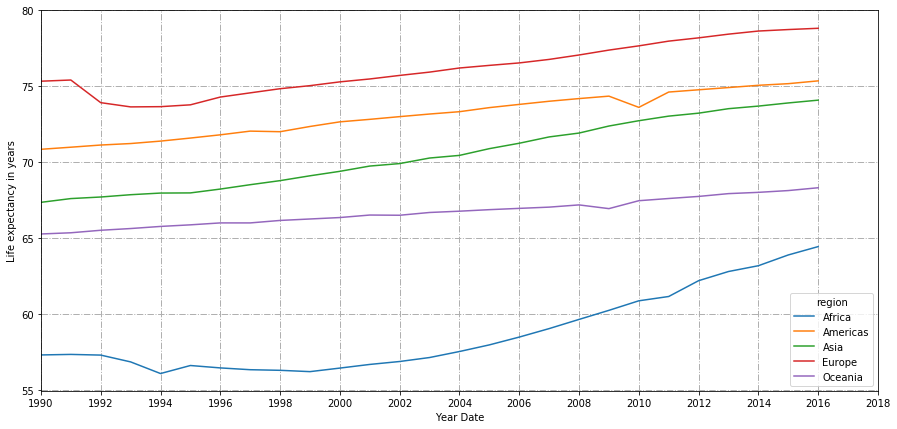

In [12]:
mergedData = mergeDataFrames(X,Y,'ccode','country-code')
mergedData = mergedData.dropna(axis=0, how='any')
fig, ax = plt.subplots(figsize=(15,7))
z = mergedData.groupby(['year','region'])['ihme_lifexp_allt'].mean()
z.unstack().plot(ax=ax)
#Plot configuration
plt.grid( linestyle='dashdot', linewidth=1)
plt.xlabel('Year Date')
plt.ylabel('Life expectancy in years')
plt.xticks(np.arange(1990, 2019, step=2))
plt.yticks(np.arange(55, 85, step=5))


                What we did ? The plot represents the change of life expectancy of all the continents over the years
                
   - representation of the years from 1990 to 2018 in the X-axis.
   
   - representation of the life_expectancy from 55 to 80 (lowest and highest values in our data).
   
   - elimination of the values before the 90's as the data wasn't sufficient enough to be significant.
   
                                          Interpretation of the plot:
                                          
   - Globally the life expectancy is increasing over the years.
   
   - There are big disparities between continents with high standards of living and continents with lower standards of living        (developped and developping continents).
   
   - Africa is indead the continent with the lowest life expectancy rate, but things have been looking steadily upwards from        the 2000’s and its has by far the most increasing gradient. 
   
   - There are indead some sudden dips in the graph at some years, these are caused by major events. We investigated some of        these years by printing the life expectancies of each continent before and after this critical years and see where the decreasing happend:
   
             1. Europe: 
                      -- 1991-1992: some countries that were part of the Soviet Eunion joined the Europe, so this 
                                     altered the data and influenced the mean of life expectancy in Europe (Example: Bosnia 
                                     and Herzegovina & Belarus).
                      -- 1992-1995: The Bosnian war.   
             2. Americas:
                      -- 2010: There were an earthcake in Haiti so the life expectancy decreased in Haiti from 52.98 to 31.64.
             3. Oceania: 
                      -- 2009: There were an earthcake in Tonga and Samoa where life expectancy decreased respectally 
                                from 69.68 to 67.85 and from 71.34 to 69.26.
             4. Africa:
                      -- 1994: Genocide of Rwanda the life expectancy dropped from 47.23 to 11.48 
                      -- 2011: Civilian war in Libya life expectancy decreased from 76.05 to 60.25   								


### Task 2: Investigating Corruption (3 pts)

In this second part, we focus on corruption as measured by the _Bayesian Corruption Indicator (BCI)_ (Column bci_bci). 
Explore the data for factors that correlate with corruption, and visualize your findings.  
__Note__: you may NOT consider correlations with other columns that explicitly measure corruption.

50% Baseline: Plotting values from one other column in the data against the BCI in a properly designed plot, where some correlation becomes apparent.

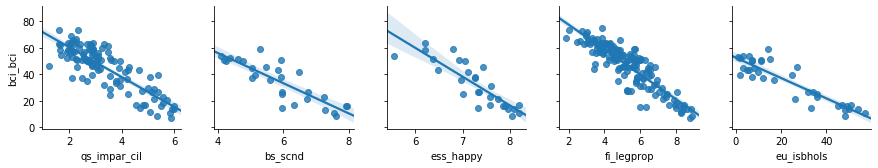

qs_impar_cil: Impartial Public Administration
bs_scnd: Social Cohesion and Equality
ess_happy:  Subjective Happiness
fi_legprop: Legal Structure and Security of Property Rights
eu_isbhols: Booked travel and holiday accommodation over the Internet



In [105]:
def correlation(dataset, threshold):
 indexNames = []
 for i, row in dataset.iterrows():
     if (abs(row['bci_bci']) <= threshold or abs(row['bci_bci'])== 1):
        indexNames.append(i)
 dataset.drop(indexNames , inplace=True)

data = pd.read_csv('qog_std_cs_jan19.csv', index_col=0)

columns=['sgi_so','eu_isbuy3','wel_rli','hf_govint','icrg_qog','wel_rol', 'qs_impar','wbgi_rle', 'ess_trlegal',"fi_legprop_pd","ti_cpi_min","wbgi_cce","ti_cpi_max","ti_cpi","wel_coc","aii_q11","aii_q12","aii_q13","aii_q36","aii_q35","bci_bcistd","bti_acp","ccp_cc","gcb_pcjmost","gcb_pcjsome","gcb_pcpolmost","gcb_fcbad","gcb_fcwell","gcb_orcag","gcb_orcdis","gcb_pcpolsome","gcb_pj","gcb_ppol","sgi_qdrlc","vdem_jucorrdc","gcb_pmedia","gcb_pclmost","gcb_pclsome","gcb_ppa","gcb_pparl","sgi_qdrlc","gcb_pb","gcb_pcbmost","gcb_pcbsome","gcb_pcrmost","gcb_pcrsome","gcb_prel"]
data = data.drop(columns=columns)

corr = data.corr()
corr = corr.iloc[:,corr.columns.get_loc('bci_bci'):corr.columns.get_loc('bci_bci')+1]
correlation(corr,0.84)
corr = corr.dropna(axis=0, how='any').sort_values(by=['bci_bci'], ascending=False)
indexNames = list(corr.index)
plot = sns.pairplot(data=data,
                  x_vars=indexNames,
                  y_vars=['bci_bci'],kind='reg')
plt.show()
print("qs_impar_cil: Impartial Public Administration\nbs_scnd: Social Cohesion and Equality\ness_happy:  Subjective Happiness\nfi_legprop: Legal Structure and Security of Property Rights\neu_isbhols: Booked travel and holiday accommodation over the Internet\n")




                                                 What we did : 
  The plot represents the influence of corruption in other index that are present in our Data
 
                                         How we did it: 
  
   - fixed the number of visualisation to five (05): the most significant ones.
   - Selection of the features that correlate above 84% with bci_bci.
   - Dropping features that has the same meaningby keeping the feature that correlates the most (example: features that
     describe how good or bad is a government). The aim is to show that corruption influences highly different other aspects such as government quality, hapiness, etc.
    - plotting the features against the corruption.
 
                                   Interpretation of the plot:
                                   
      - qs_impar_cil: The index measures to what extent government institutions exercise their power impartially. This makes
                      sense as a corrupt government won't be impartial.
      - bs_scnd: Social Cohesion and Equality Social cohesion and non-discrimination. This mesures the Social Inclusion Policy
                 and non descrimination such as the number of parliament seats held by men and women.
      - Ess_happy: how happy would you say you are? This features estimates the happiness of a the people
                   Clearly: The more corruption the less happy people are.
      - fi_legprop: This index is related to the independence of judiciary and the interference of military in laws and                             politics.
      - eu_isbhols: Booked travel and holiday accommodation over the Internet. This index shows that the corruption is                             correlated with the electronic commerce. (We found other e-commerce related features that we dropped from                       the visualisation)
     